In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
ushuaia ar
barrow us
chuy uy
kavaratti in
maxixe mz
marathon ca
port alfred za
caravelas br
gorno-chuyskiy ru
midland us
mataura pf
san ramon bo
stoyba ru
marzuq ly
khatanga ru
hobart au
yicheng cn
ushuaia ar
nanortalik gl
borama so
mandiana gn
butaritari ki
busca it
yazman pk
cape town za
talnakh ru
kerema pg
new norfolk au
torbay ca
nouadhibou mr
yellowknife ca
yellowknife ca
port alfred za
umzimvubu za
okhotsk ru
mataura pf
kloulklubed pw
rosario br
saskylakh ru
ilulissat gl
bredasdorp za
iskateley ru
abu zabad sd
nikolskoye ru
punta arenas cl
severo-kurilsk ru
kavieng pg
santa cruz cr
puerto ayora ec
hermanus za
inongo cd
ribeira grande pt
whitianga nz
hermanus za
taolanaro mg
rikitea pf
aswan eg
saint-philippe re
port alfred za
esperance au
derzhavinsk kz
busselton au
new norfolk au
pisco pe
jamestown sh
nikolskoye ru
taolanaro mg
ushuaia ar
busselton au
port alfred za
rikitea pf
sao filipe cv
luderitz na
rorvik no
kapaa us
butaritari ki
bardiyah ly
chapais ca
ba

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# import requests and api key
import requests
from config import weather_api_key

In [8]:
# build basic url for openweathermap using my weather api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# import time library and the datetime module from the datetime libary
import time
from datetime import datetime

In [10]:
# create an empty list to hold the weather data.
city_data = []
# print the beginning of the loggings.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | maxixe
Processing Record 7 of Set 1 | marathon
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 11 of Set 1 | midland
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | san ramon
Processing Record 14 of Set 1 | stoyba
City not found. Skipping...
Processing Record 15 of Set 1 | marzuq
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | yicheng
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | borama
City not found. Skipping...
Processing Record 21 of Set 1 | mandiana
Proc

In [38]:
len(city_data)

569

In [39]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,55.80,76,40,27.63,PT,2022-04-10 14:55:24
1,Ushuaia,-54.8000,-68.3000,44.22,61,0,4.61,AR,2022-04-10 14:55:24
2,Barrow,71.2906,-156.7887,-6.83,93,97,8.93,US,2022-04-10 14:55:25
3,Chuy,-33.6971,-53.4616,76.62,58,3,11.63,UY,2022-04-10 14:55:25
4,Kavaratti,10.5669,72.6420,83.97,75,100,8.75,IN,2022-04-10 14:55:25


In [40]:
# fix columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2022-04-10 14:55:24,38.5167,-28.7000,55.80,76,40,27.63
1,Ushuaia,AR,2022-04-10 14:55:24,-54.8000,-68.3000,44.22,61,0,4.61
2,Barrow,US,2022-04-10 14:55:25,71.2906,-156.7887,-6.83,93,97,8.93
3,Chuy,UY,2022-04-10 14:55:25,-33.6971,-53.4616,76.62,58,3,11.63
4,Kavaratti,IN,2022-04-10 14:55:25,10.5669,72.6420,83.97,75,100,8.75


In [41]:
# create the output file csv
output_data_file = "weather_data/cities.csv"
# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

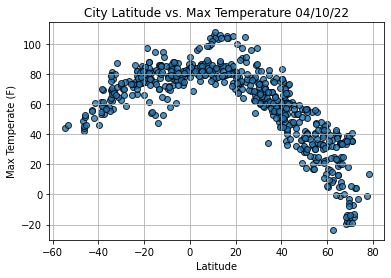

In [43]:
# import time module
import time

# build the scatter plot for latidue vs max temp
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperate (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save this figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

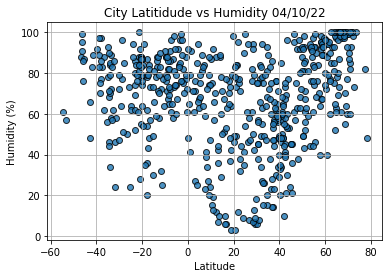

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# incorporate the other graph properties

plt.title(f"City Latitidude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


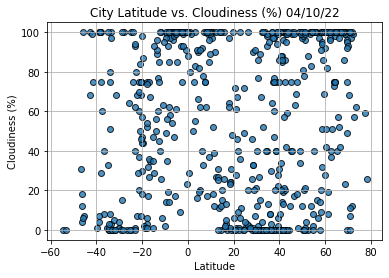

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

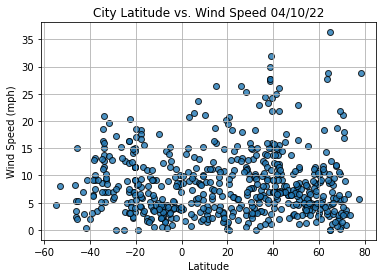

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

SyntaxError: invalid syntax (Temp/ipykernel_20216/2317673131.py, line 3)

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

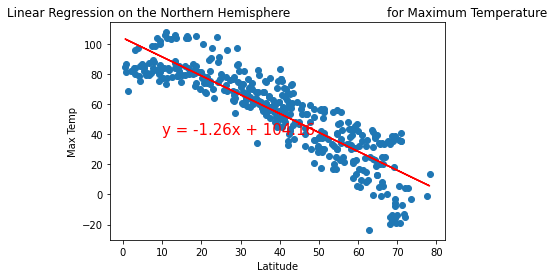

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

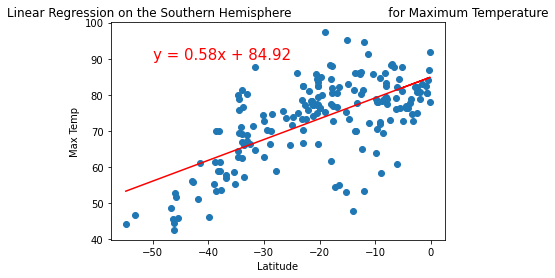

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

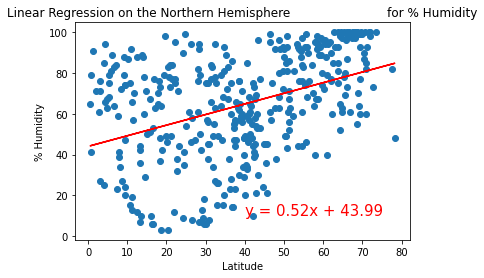

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

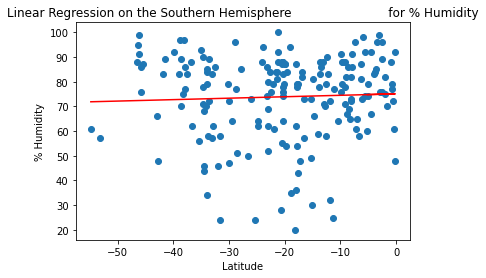

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

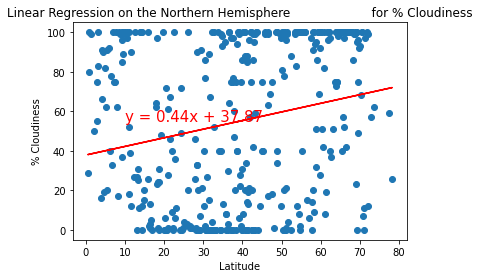

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

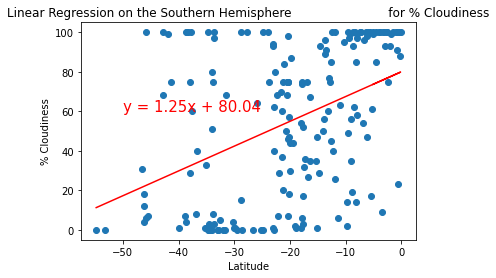

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

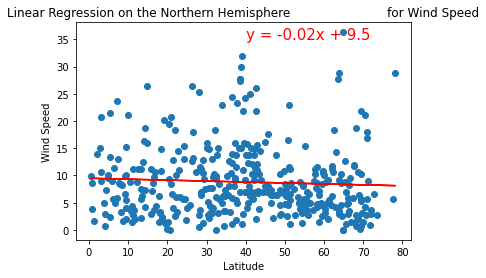

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

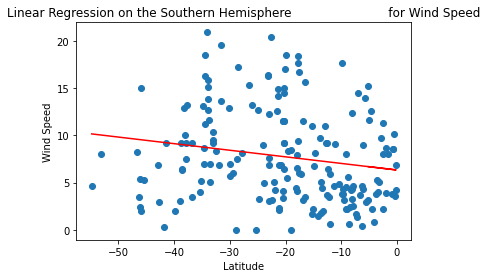

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))